# Loan Defaulting Status Prediction Model
## Goal:
#### To avoid loan applicants who are likely to not pay back the loan  
Using the data on loans and their status (information on whether or not the borrower defaulted (charge-off)), to analyse the features of a loan applicant that would determine whether the person would pay back the loan or not, and whether a model can be built to predict the same. This can be used later to assess if an applicant in the future can pay back the loan.
## Data:
Subset of DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## Importing the data and other libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
df = pd.read_csv('lending_club_loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

In [4]:
df.describe().transpose() #Statistics of each column/attribute

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
len(df.columns) #No of attributes in dataset

27

In [7]:
df.columns #Attributes

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
df.shape[0] #No of samples

396030

<AxesSubplot:xlabel='loan_status', ylabel='count'>

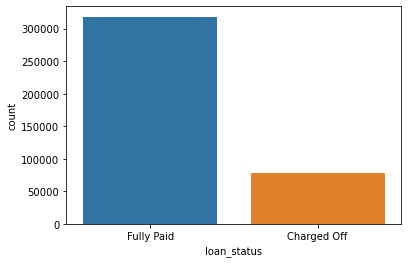

In [9]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

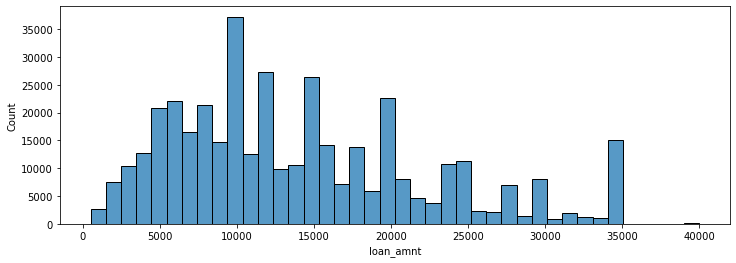

In [10]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],bins=40)

### Correlation between continuous variables

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

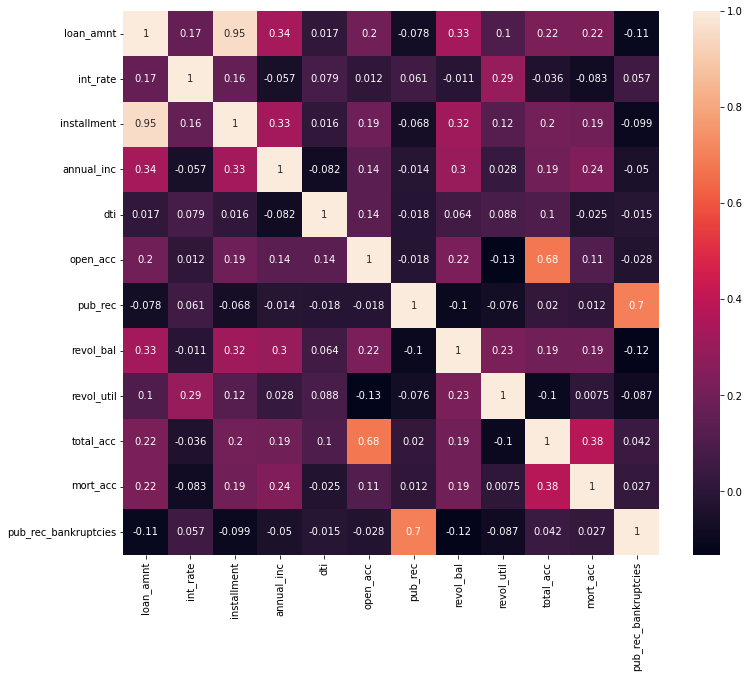

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

#### Correlation between loan_amnt and installment

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

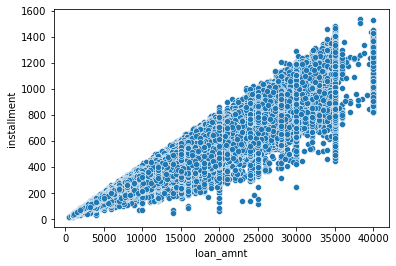

In [13]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

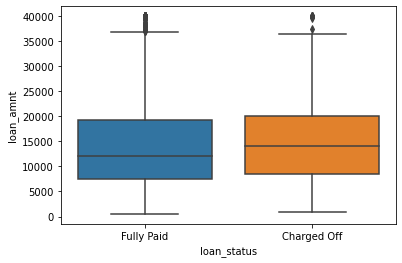

In [14]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

<AxesSubplot:xlabel='term', ylabel='count'>

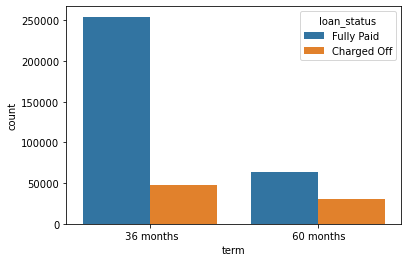

In [15]:
sns.countplot(x='term',data=df,hue='loan_status')

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

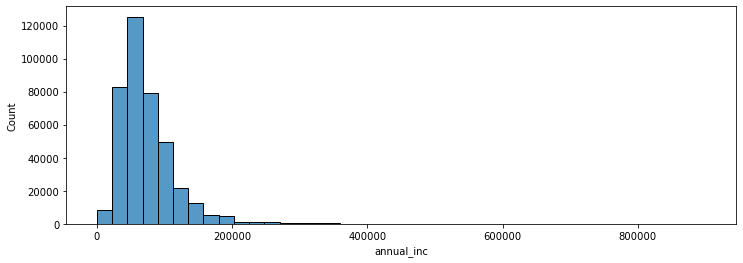

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(df['annual_inc'].sort_values(ascending=True).iloc[:-100],bins=40)

In [17]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

<AxesSubplot:>

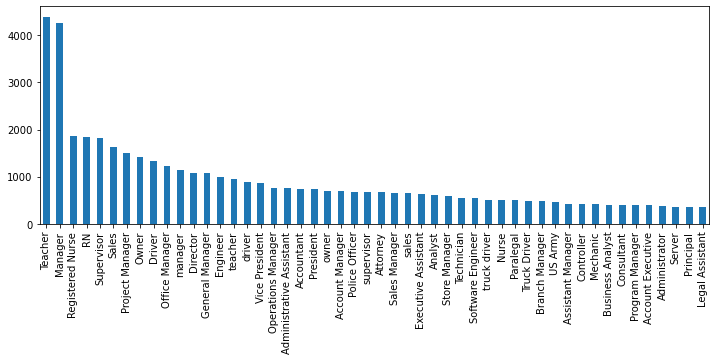

In [18]:
plt.figure(figsize=(12,4))
df['emp_title'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar')

<AxesSubplot:xlabel='emp_title'>

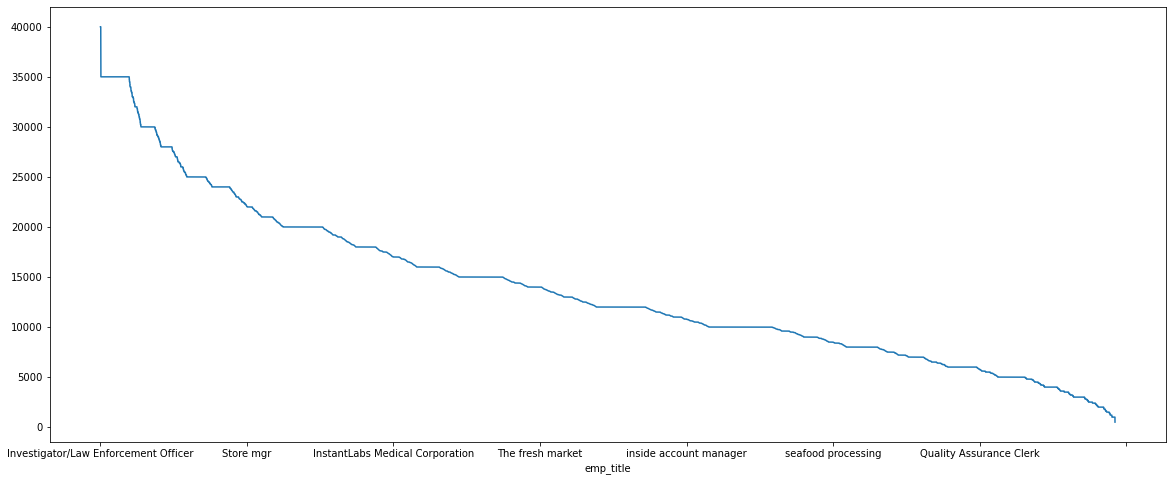

In [19]:
plt.figure(figsize=(20,8))
df.groupby('emp_title').mean()['loan_amnt'].sort_values(ascending=False).plot(kind='line')

<AxesSubplot:xlabel='emp_title'>

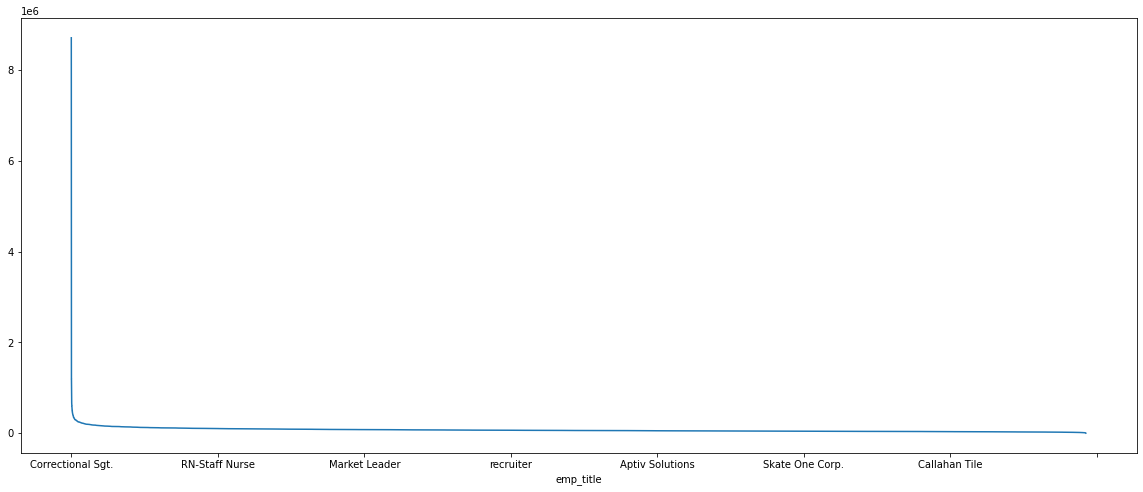

In [20]:
plt.figure(figsize=(20,8))
df.groupby('emp_title').mean()['annual_inc'].sort_values(ascending=False).plot(kind='line')

In [21]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
grade_order = sorted(df['grade'].unique())

<AxesSubplot:xlabel='grade', ylabel='count'>

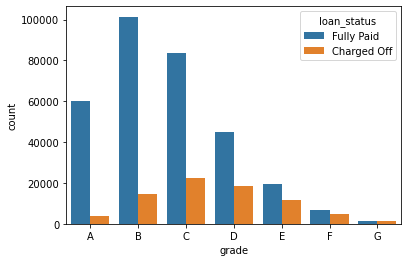

In [23]:
sns.countplot(x='grade',data=df,order = grade_order, hue='loan_status')

In [24]:
subgrade_order = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

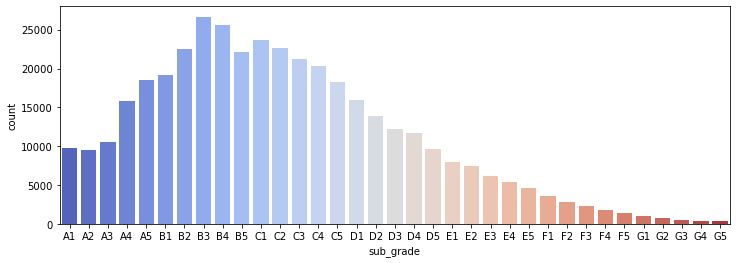

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order = subgrade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

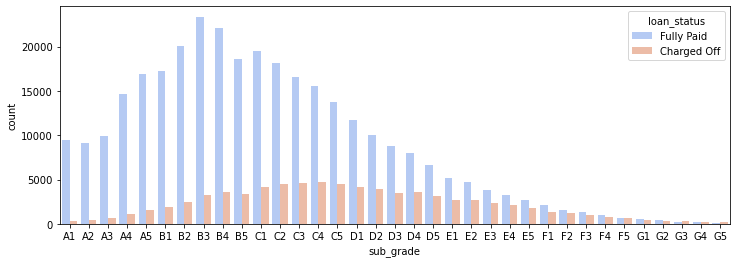

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order = subgrade_order, hue='loan_status', palette='coolwarm')

In [27]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

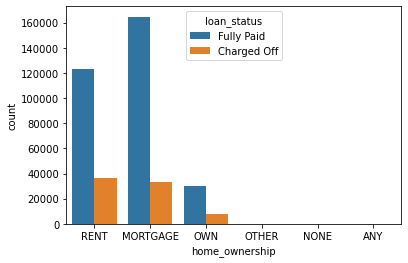

In [28]:
sns.countplot(x='home_ownership',data=df, hue='loan_status')

In [29]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

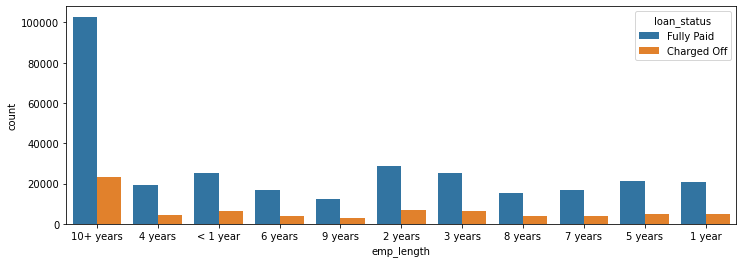

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df, hue='loan_status')

In [31]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Creating new column is_loan_settled to identify correlation between loan repayment and continuous features

In [32]:
df['is_loan_settled'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

<AxesSubplot:>

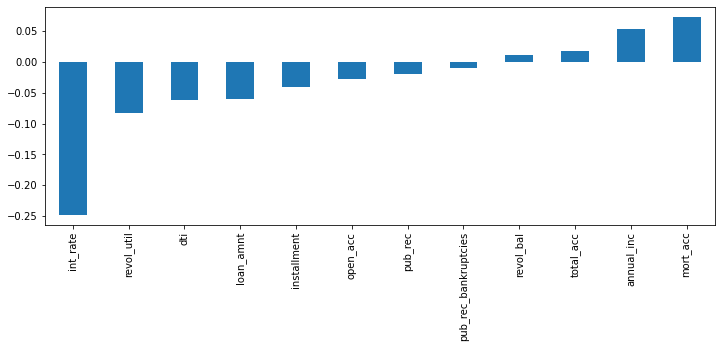

In [33]:
plt.figure(figsize=(12,4))
df.corr()['is_loan_settled'].sort_values().drop('is_loan_settled').plot(kind='bar')

## Data Pre-Processing

### Missing data

In [34]:
len(df)

396030

In [35]:
df.isnull().sum().sort_values() #Getting number of missing entries for each attribute

loan_amnt                   0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
dti                         0
address                     0
loan_status                 0
purpose                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
issue_d                     0
is_loan_settled             0
revol_util                276
pub_rec_bankruptcies      535
title                    1755
emp_length              18301
emp_title               22927
mort_acc                37795
dtype: int64

##### emp_title has too many distinct entries, which makes it difficult to create dummies, hence the column is dropped
And as we observed from the above plot, it is correlated with loan_amnt

In [36]:
df=df.drop('emp_title',axis=1)

##### Missing values in mort_acc can be imputed using average of the values using  the highly correlated feature

In [37]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
is_loan_settled         0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

##### We find that total_acc is the most correlated feature

In [38]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

##### Function to fill null values in mort_acc with average mort_acc based on total_acc

In [39]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here is a Series containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [40]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [41]:
df['title'].unique() #Finding unique loan titles

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [42]:
df['title'].nunique() #Finding count of unique loan titles

48817

##### title has too many distinct entries, which makes it difficult to create dummies, hence the column is dropped

In [43]:
df=df.drop('title',axis=1)

In [44]:
sorted(df['emp_length'].dropna().unique()) #Computing unique entries in emp_length column

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [45]:
emp_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

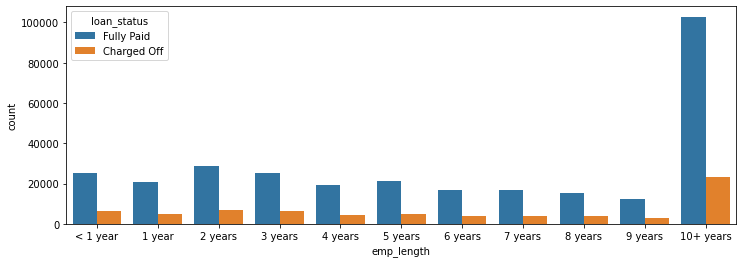

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',order = emp_length_order,data=df, hue='loan_status') 

In [47]:
emp_fp = df[df['is_loan_settled']==1].groupby("emp_length").count()['loan_status'] #Finding total count of fully paid applicants for each emp_length category

In [48]:
emp_co = df[df['is_loan_settled']==0].groupby("emp_length").count()['loan_status'] #Finding total count of charged off applicants for each emp_length category

In [49]:
emp_ratio = emp_fp/emp_co #Computing ratio of fully paid to charged off applicants for each emp_length to observe effect of emp_length

<AxesSubplot:xlabel='emp_length'>

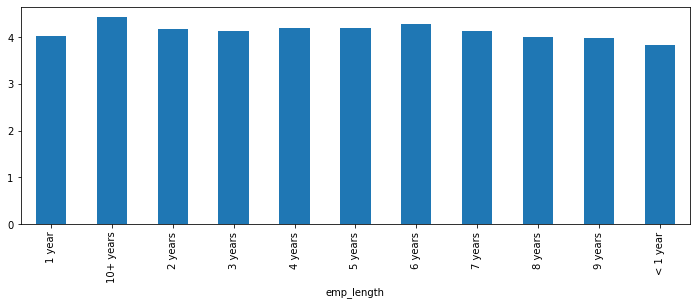

In [50]:
plt.figure(figsize=(12,4))
emp_ratio.plot(kind='bar')

#### We can observe that emp_length has no effect on loan defaulting status, hence we drop the column

In [51]:
df=df.drop('emp_length',axis=1)

In [52]:
df.isnull().sum().sort_values() #Getting number of missing entries for each attribute

loan_amnt                 0
mort_acc                  0
application_type          0
initial_list_status       0
total_acc                 0
revol_bal                 0
pub_rec                   0
open_acc                  0
earliest_cr_line          0
address                   0
purpose                   0
dti                       0
issue_d                   0
verification_status       0
annual_inc                0
home_ownership            0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
term                      0
loan_status               0
is_loan_settled           0
revol_util              276
pub_rec_bankruptcies    535
dtype: int64

#### We already saw that installment is highly correlated with loan_amnt (Correlation = 0.95), hence the column is dropped

In [53]:
df=df.drop('installment',axis=1)

#### These missing observations constitute to less than 0.2% of total observations, hence can be dropped 

In [54]:
df=df.dropna()

In [55]:
df.isnull().sum().sort_values() #Getting number of missing entries for each attribute

loan_amnt               0
pub_rec_bankruptcies    0
mort_acc                0
application_type        0
initial_list_status     0
total_acc               0
revol_util              0
revol_bal               0
pub_rec                 0
open_acc                0
earliest_cr_line        0
dti                     0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
sub_grade               0
grade                   0
int_rate                0
term                    0
address                 0
is_loan_settled         0
dtype: int64

#### earliest_cr_line appears to be a historical time stamp feature, we extract the month, year for analysis

In [56]:
df['earliest_cr_month']= df['earliest_cr_line'].apply(lambda x: x.split('-')[0])

In [57]:
df['earliest_cr_year']= df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

<AxesSubplot:xlabel='earliest_cr_month', ylabel='count'>

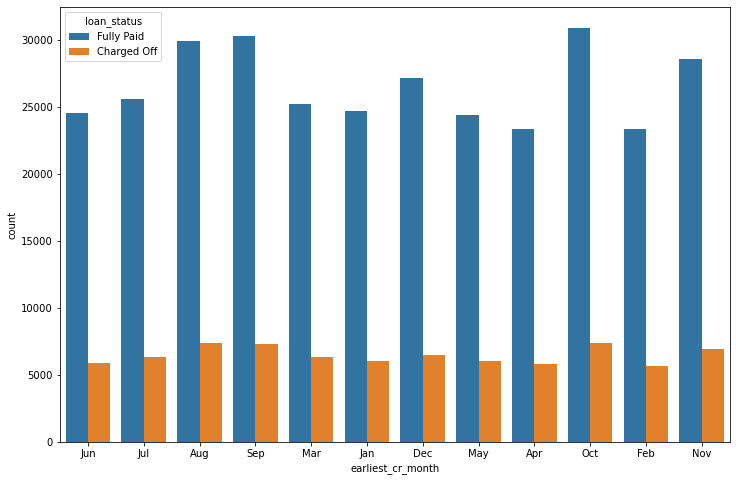

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(x='earliest_cr_month',data = df, hue='loan_status')

In [59]:
crmonth_fp = df[df['is_loan_settled']==1].groupby("earliest_cr_month").count()['loan_status']  #Finding total count of fully paid applicants for each each cr_month category

In [60]:
crmonth_co = df[df['is_loan_settled']==0].groupby("earliest_cr_month").count()['loan_status'] #Finding total count of charged off applicants for each each cr_month category

In [61]:
crmonth_ratio = crmonth_fp/crmonth_co #Computing the ratio between fully paid to charged off applicants for each each cr_month category

<AxesSubplot:xlabel='earliest_cr_month', ylabel='Loan settlment Ratio (Fully Paid:Charged Off)'>

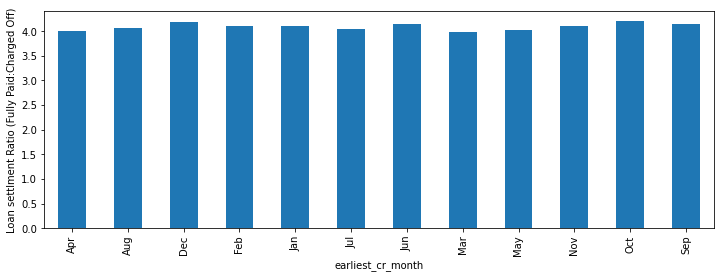

In [62]:
plt.figure(figsize=(12,4))
crmonth_ratio.plot(kind='bar',ylabel='Loan settlment Ratio (Fully Paid:Charged Off)')

<AxesSubplot:xlabel='earliest_cr_year', ylabel='Count'>

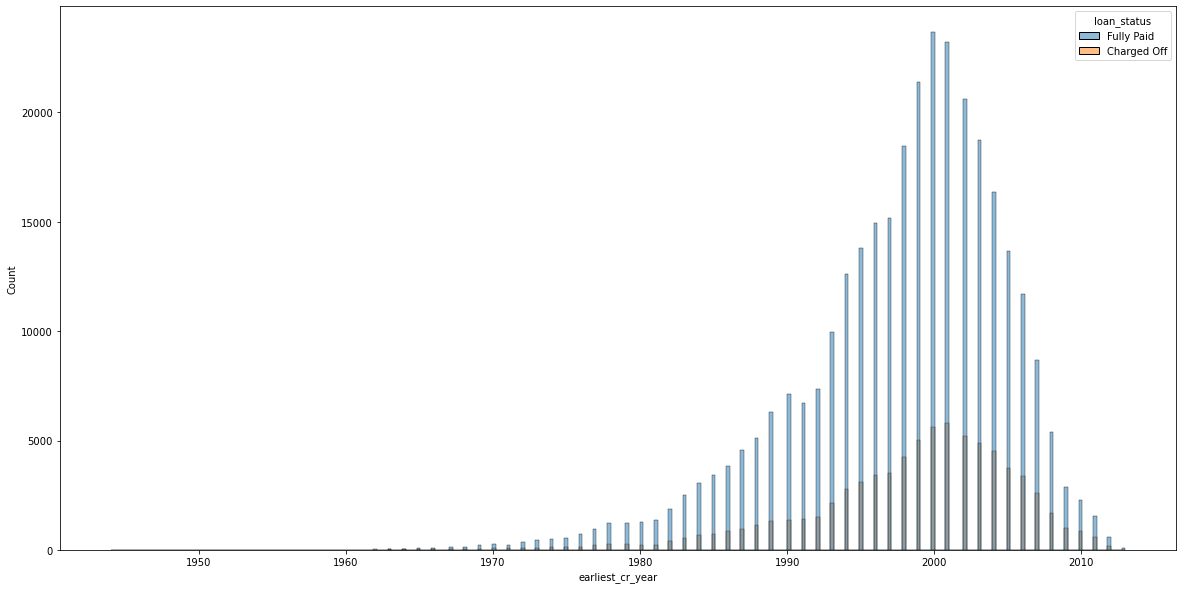

In [63]:
plt.figure(figsize=(20,10))
sns.histplot(x='earliest_cr_year',data = df, hue = 'loan_status')

<AxesSubplot:xlabel='earliest_cr_year', ylabel='Avg Probability of loan settlement'>

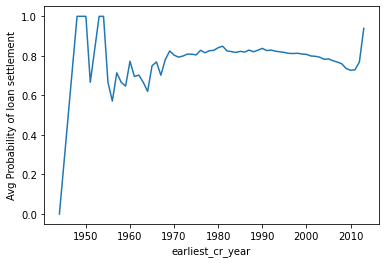

In [64]:
plt.ylabel("Avg Probability of loan settlement")
df.groupby('earliest_cr_year').mean()['is_loan_settled'].plot(kind='line')

In [65]:
cryear_fp = df[df['is_loan_settled']==1].groupby("earliest_cr_year").count()['loan_status']  #Finding total count of fully paid applicants for each each cr_year category

In [66]:
cryear_co = df[df['is_loan_settled']==0].groupby("earliest_cr_year").count()['loan_status']  #Finding total count of charged off applicants for each each cr_year category

In [67]:
cryear_ratio = cryear_fp/cryear_co  #Computing the ratio between fully paid to charged off applicants for each each cr_year category

<AxesSubplot:xlabel='earliest_cr_year', ylabel='Loan settlment Ratio (Fully Paid:Charged Off)'>

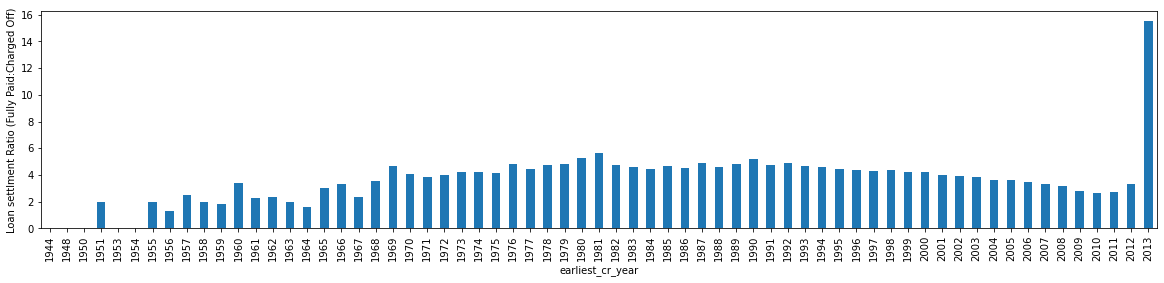

In [68]:
plt.figure(figsize=(20,4))
cryear_ratio.plot(kind='bar',ylabel='Loan settlment Ratio (Fully Paid:Charged Off)')

#### We can observe that earliest_cr_line, earliest_cr_month, earliest_cr_year has no effect on loan defaulting status, hence we drop the column

In [69]:
df=df.drop(['earliest_cr_line','earliest_cr_month','earliest_cr_year'],axis=1)

#### Analysing Initial listing status and loan purpose attributes

In [70]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

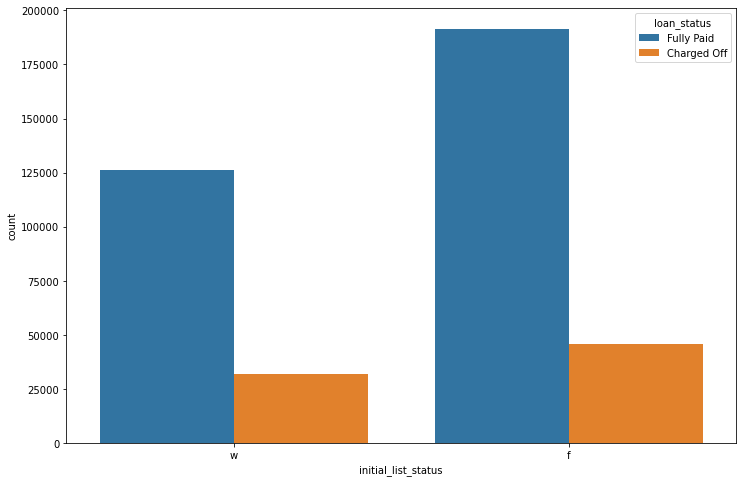

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

In [72]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

<AxesSubplot:>

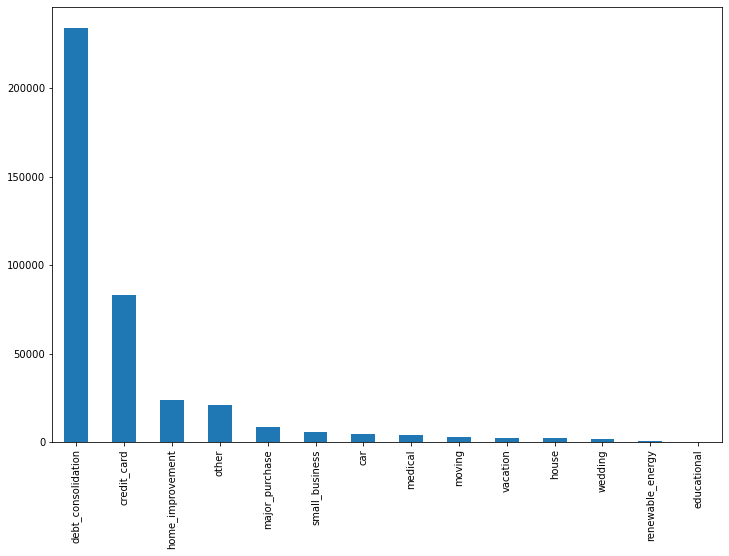

In [73]:
plt.figure(figsize=(12,8))
df['purpose'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [75]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [76]:
df['zip_code']=df['address'].apply(lambda x: x.split(' ')[-1])

In [77]:
df['state']=df['address'].apply(lambda x: x.split(' ')[-2])

In [78]:
df['state'].unique()

array(['OK', 'SD', 'WV', 'MA', 'VA', 'DE', 'TX', 'AE', 'AP', 'NM', 'MS',
       'OR', 'NH', 'HI', 'PA', 'CO', 'AL', 'FL', 'AZ', 'WI', 'NC', 'IN',
       'MO', 'AA', 'TN', 'KS', 'ND', 'CT', 'WY', 'NE', 'RI', 'AR', 'MI',
       'IL', 'LA', 'NY', 'IA', 'AK', 'UT', 'MD', 'WA', 'MN', 'OH', 'MT',
       'NJ', 'DC', 'NV', 'VT', 'CA', 'ME', 'ID', 'GA', 'KY', 'SC'],
      dtype=object)

<AxesSubplot:>

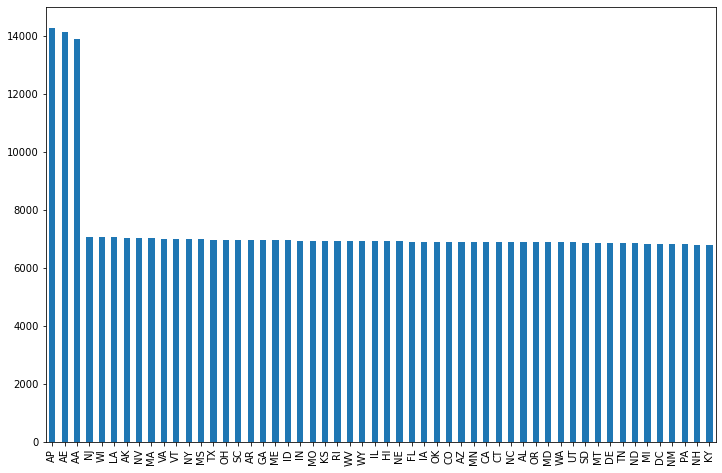

In [79]:
plt.figure(figsize=(12,8))
df['state'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='state', ylabel='count'>

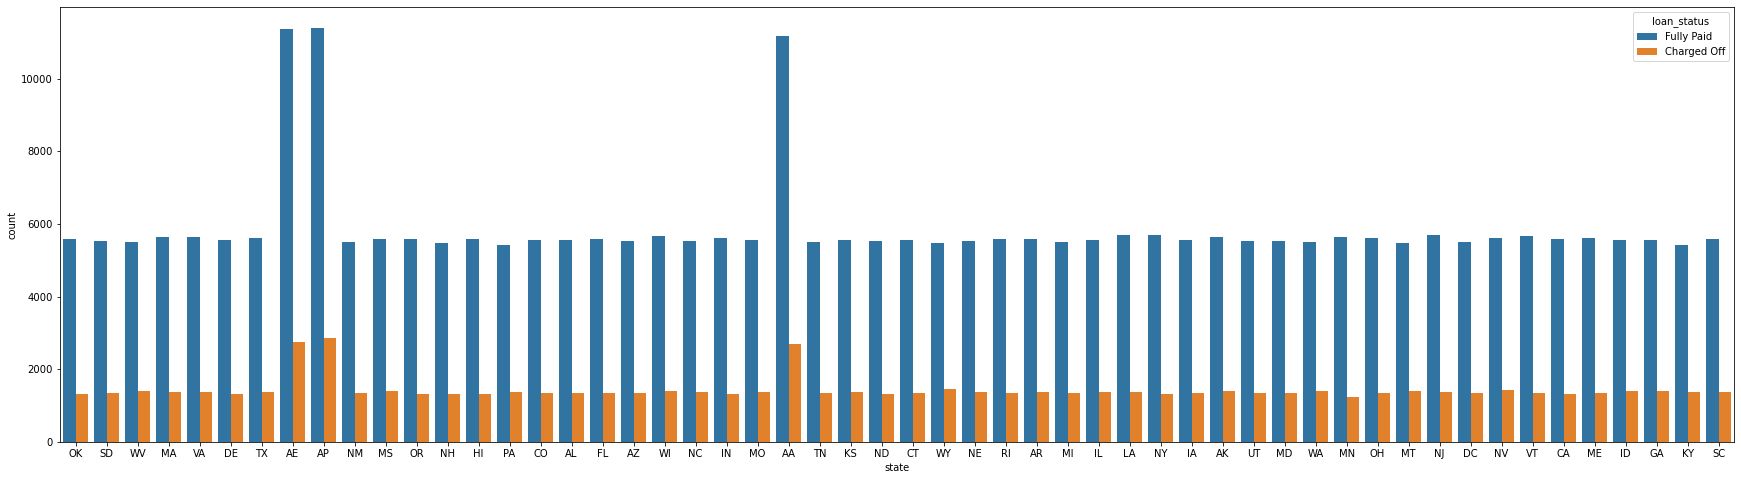

In [80]:
plt.figure(figsize=(30,8))
sns.countplot(x='state',data=df,hue='loan_status')

In [81]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

<AxesSubplot:xlabel='zip_code', ylabel='Avg Probability of loan settlement'>

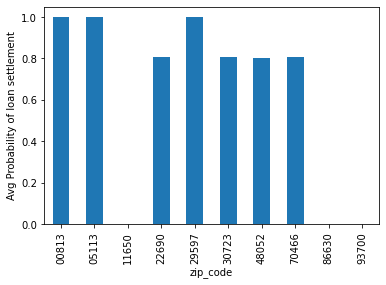

In [82]:
plt.ylabel("Avg Probability of loan settlement")
df.groupby('zip_code').mean()['is_loan_settled'].plot(kind='bar')

## Dealing with Categorical variables

In [83]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [84]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

#### Information in grades is already contained in subgrades, hence it is dropped

In [85]:
df = df.drop('grade',axis=1)

#### Creating dummy variables for the sub_grade feature

In [86]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [87]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

#### Creating dummy variables for the features (verification_status, application_type,initial_list_status,purpose)

In [88]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [89]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

#### We saw that certain categories in home_ownership could be combined

In [90]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [91]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [92]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [93]:
homeownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [94]:
df = pd.concat([df.drop('home_ownership',axis=1),homeownership_dummies],axis=1)

#### Creating dummies for zipcode, concatenating them

In [95]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)

In [96]:
df = pd.concat([df.drop(['zip_code','state','address'],axis=1),zip_dummies],axis=1)

#### In theory we wouldn't have an issue_date, since this is an information for whether or not a loan would be issued, we'll drop this feature.

In [97]:
df = df.drop('issue_d',axis=1) 

## Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
df = df.drop('loan_status',axis=1)

In [100]:
X = df.drop('is_loan_settled',axis=1).values #Removing the label from the features, storing it in feature vector X
y = df['is_loan_settled'].values #Storing labels in label vector

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalising the Data

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)

In [105]:
X_test = scaler.transform(X_test)

## Creating the Model

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
model = Sequential()
# input layer
model.add(Dense(76,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
#Dropouts are added to prevent overfitting
# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [109]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20) #Using earlystopping to avoid overfitting

In [110]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=600,
          validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/100
527/527 [==============================] - 4s 5ms/step - loss: 0.3568 - val_loss: 0.2678
Epoch 2/100
527/527 [==============================] - 2s 4ms/step - loss: 0.2736 - val_loss: 0.2643
Epoch 3/100
527/527 [==============================] - 2s 4ms/step - loss: 0.2690 - val_loss: 0.2632
Epoch 4/100
527/527 [==============================] - 2s 4ms/step - loss: 0.2662 - val_loss: 0.2627
Epoch 5/100
527/527 [==============================] - 2s 4ms/step - loss: 0.2648 - val_loss: 0.2622
Epoch 6/100
527/527 [==============================] - 2s 4ms/step - loss: 0.2634 - val_loss: 0.2625
Epoch 7/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2626 - val_loss: 0.2619
Epoch 8/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2618 - val_loss: 0.2625
Epoch 9/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2610 - val_loss: 0.2619
Epoch 10/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2605 - val_lo

527/527 [==============================] - 3s 5ms/step - loss: 0.2538 - val_loss: 0.2610
Epoch 82/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2536 - val_loss: 0.2608
Epoch 83/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2536 - val_loss: 0.2607
Epoch 84/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2534 - val_loss: 0.2611
Epoch 85/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2535 - val_loss: 0.2608
Epoch 86/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2537 - val_loss: 0.2604
Epoch 87/100
527/527 [==============================] - 2s 5ms/step - loss: 0.2536 - val_loss: 0.2607
Epoch 87: early stopping


## Saving Model

In [111]:
from tensorflow.keras.models import load_model
import pickle

In [112]:
model.save('loan_status_project_model.h5')  

In [113]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-25 14:04:37         2647
metadata.json                                  2023-03-25 14:04:37           64
variables.h5                                   2023-03-25 14:04:37       143032


## Evaluating Model

<AxesSubplot:>

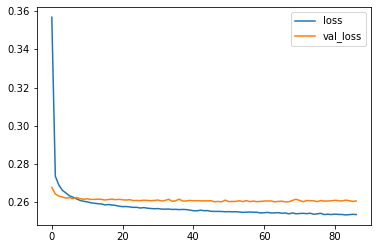

In [114]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
def classify(p):
    #Assigns 0/1 based on sigmoid probability
    if p>0.5:
        return 1
    else :
        return 0

In [117]:
predictions = pd.DataFrame(map(lambda x: classify(x),model.predict(X_test)))

2471/2471 [==============================] - 3s 1ms/step


In [118]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

